In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

## Liebre Image Figure

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [3]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

In [4]:
#image_array = perc_norm(liebre1_image_path)

In [5]:
#image_rgb_array = np.uint8(image_array)

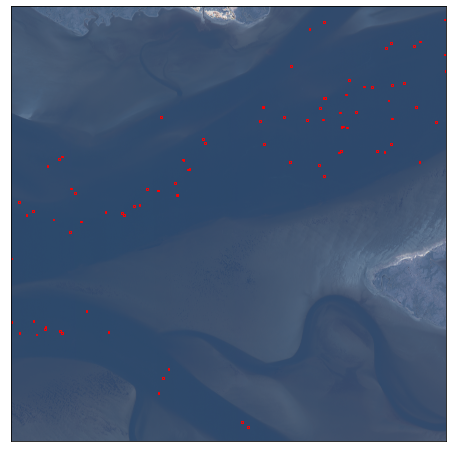

In [6]:
#plot_rgb_boxes(liebre1_image_path, liebre1_box_path, image_rgb_array) #crop even a bit more

## Example tiles figure

In [5]:
whale_tile_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/images/liebre1_32.png"
boat_tile_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/images/liebre2neg_112.png"

In [6]:
whale_tile = Image.open(whale_tile_path)
boat_tile = Image.open(boat_tile_path)

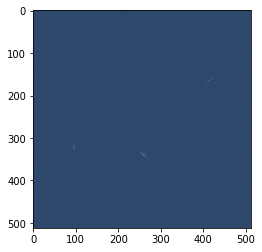

In [9]:
plt.imshow(whale_tile)


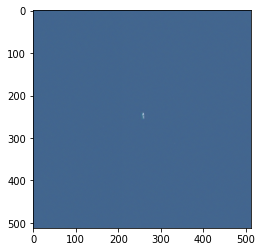

In [10]:
plt.imshow(boat_tile)

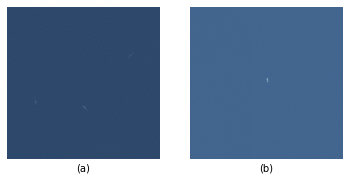

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel('(a)')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.tick_params(labelleft=False,labelbottom=False, top=False, bottom=False, left=False, right=False)
ax1.imshow(whale_tile)

ax2.set_xlabel('(b)')
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.tick_params(labelleft=False, labelbottom=False, top=False, bottom=False, left=False, right=False)
ax2.imshow(boat_tile)

image_format_svg = 'svg' 
image_name_svg = 'sattiles_report_plot.svg'
image_format_png = 'png' 
image_name_png = 'sattiles_report_plot.png'

fig.savefig(image_name_svg, format=image_format_svg, dpi=200)
fig.savefig(image_name_png, format=image_format_png, dpi=200)

## Aerial Figure

In [39]:
aerial1_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/aerial_images/images/aerial_100.png"
aerial2_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/aerial_images/images/aerial_106.png"
aerial3_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/aerial_images/images/aerial_396.png"
aerial4_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/UAV_jsons/180620_F4_Luna.png"

In [40]:
aerial1 = Image.open(aerial1_path)
aerial2 = Image.open(aerial2_path)
aerial3 = Image.open(aerial3_path)
aerial4 = Image.open(aerial4_path)

AxesSubplot(0.125,0.536818;0.352273x0.343182)


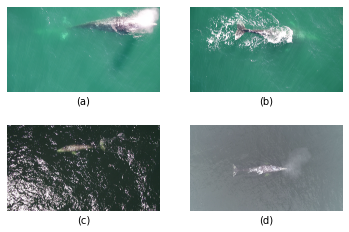

In [42]:
fig, axes = plt.subplots(2, 2)
print(axes[0,0])

axes[0,0].set_xlabel('(a)')
axes[0,0].spines['top'].set_color('none')
axes[0,0].spines['bottom'].set_color('none')
axes[0,0].spines['left'].set_color('none')
axes[0,0].spines['right'].set_color('none')
axes[0,0].tick_params(labelleft=False,labelbottom=False, top=False, bottom=False, left=False, right=False)
axes[0,0].imshow(aerial1)

axes[0,1].set_xlabel('(b)')
axes[0,1].spines['top'].set_color('none')
axes[0,1].spines['bottom'].set_color('none')
axes[0,1].spines['right'].set_color('none')
axes[0,1].spines['left'].set_color('none')
axes[0,1].tick_params(labelleft=False, labelbottom=False, top=False, bottom=False, left=False, right=False)
axes[0,1].imshow(aerial2)

axes[1,0].set_xlabel('(c)')
axes[1,0].spines['top'].set_color('none')
axes[1,0].spines['bottom'].set_color('none')
axes[1,0].spines['left'].set_color('none')
axes[1,0].spines['right'].set_color('none')
axes[1,0].tick_params(labelleft=False, labelbottom=False, top=False, bottom=False, left=False, right=False)
axes[1,0].imshow(aerial3)

axes[1,1].set_xlabel('(d)')
axes[1,1].spines['top'].set_color('none')
axes[1,1].spines['bottom'].set_color('none')
axes[1,1].spines['left'].set_color('none')
axes[1,1].spines['right'].set_color('none')
axes[1,1].tick_params(labelleft=False, labelbottom=False, top=False, bottom=False, left=False, right=False)
axes[1,1].imshow(aerial4)

image_format_svg = 'svg' # e.g .png, .svg, etc.
image_name_svg = 'aerial1_report_plot.svg'
image_format_png = 'png' # e.g .png, .svg, etc.
image_name_png = 'aerial1_report_plot.png'

fig.savefig(image_name_svg, format=image_format_svg, dpi=200)
fig.savefig(image_name_png, format=image_format_png, dpi=200)

## Augmentations Figure

In [2]:
from src.preprocessing.augmentations import get_aug, visualize_bbox, visualize, visualize_subplot, generate_augmentations

In [9]:
import albumentations as A

In [85]:
image_file = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/images/liebre1_26.png"
label_file = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/labels/liebre1_26.txt"

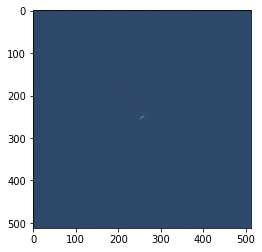

In [88]:
image = Image.open(image_file)
plt.imshow(image)

In [98]:
bboxes = []
with open(label_file, 'r') as f:
    label = f.read()
    #image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    image = np.asarray(Image.open(image_file))
    #print(image.shape)
    #print(len(image.shape))
    items = label.splitlines()
    imwidth, imheight = image.shape[0], image.shape[1]
    for i in items:
        obj = i.split()
        #print(obj)
        class_id = int(obj[0])
        x_centre = float(obj[1]) * imwidth
        y_centre = float(obj[2]) * imheight
        width = float(obj[3]) * imwidth
        height = float(obj[4]) * imheight
        bb = [None] * 4
        bb[0], bb[1], bb[2], bb[3] = x_centre-width/2, y_centre-height/2, width, height
        # x1, y1, width, height
        bboxes.append(bb)
    if items[0][0] == '0':
        annotations = {'image': image, 'bboxes': bboxes, 'category_id': [0]*len(bboxes)}
    if items[0][0] == '1':
        annotations = {'image': image, 'bboxes': bboxes, 'category_id': [1]*len(bboxes)}
    category_id_to_name = {0: 'whale', 1: 'nonwhale'}

HorizontalFlip(always_apply=False, p=1)


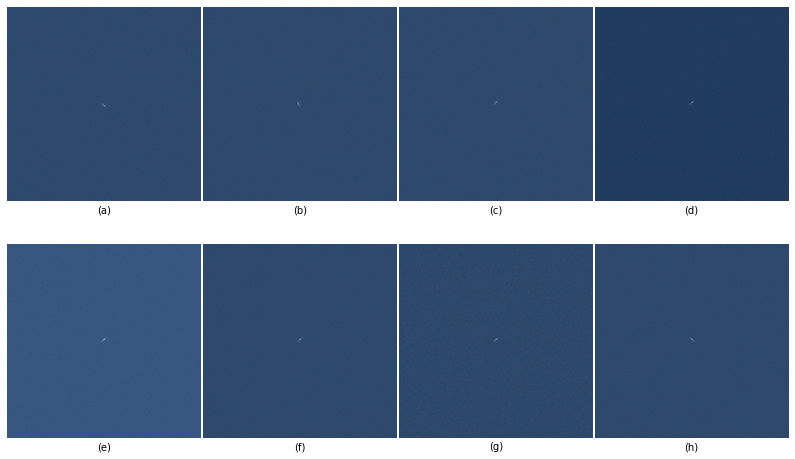

In [102]:
#Example randomly generated augmentation
#augs = [A.HorizontalFlip(p=1), A.VerticalFlip(), A.Rotate(limit=(-180,180)),
       # A.Blur(blur_limit=3), A.RandomBrightness(limit=0.2), A.RandomContrast(limit=0.2),
       # A.GaussianBlur(blur_limit=3), A.GaussNoise(var_limit=(10.0, 50.0), mean=0)]
augs = [A.HorizontalFlip(p=1), A.VerticalFlip(p=1), A.Rotate(limit=(-180,180), always_apply=True),
        A.Blur(blur_limit=3, p=1), A.RandomBrightness(limit=0.2, p=1), A.RandomContrast(limit=0.2, p=1),
        A.GaussianBlur(blur_limit=3, p=1), A.GaussNoise(var_limit=(10.0, 50.0), mean=0, always_apply=True, p=0.5)]
print(augs[0])        
#for i in augs:
    #aug = get_aug([i])
    #augmented = aug(**annotations)
    #visualize(augmented, category_id_to_name)

fig, axs = plt.subplots(2,4, figsize=(14, 8), facecolor=None, edgecolor=None)
fig.subplots_adjust(hspace = .2, wspace=.01)
#plt.axis('off')

axis = axs.ravel()
#print(axis[1,1])
c=1
labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']


for k in range(0,8):
    axis[k].set(xlabel = labels[k])
    axis[k]
    axis[k].spines['top'].set_color('none')
    axis[k].spines['bottom'].set_color('none')
    axis[k].spines['left'].set_color('none')
    axis[k].spines['right'].set_color('none')
    axis[k].tick_params(labelleft=False, labelbottom=False, top=False, bottom=False, left=False, right=False)

for i in range(0,8):
    aug = augs[i]
    augmented = aug(image=image)
    img = augmented['image'].copy()
    plt.imshow(img)
    plt.subplot(2,4,c)
    c=c+1
    
image_format_svg = 'svg' # e.g .png, .svg, etc.
image_name_svg = 'augs1_report_plot.svg'
image_format_png = 'png' # e.g .png, .svg, etc.
image_name_png = 'augs1_report_plot.png'

#fig.savefig(image_name_svg, format=image_format_svg, dpi=200)
#fig.savefig(image_name_png, format=image_format_png, dpi=200)

